In [1]:
import sqlite3

connection = sqlite3.connect('student_grades.db')

print("connected")

connected


In [2]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [3]:
# Create the Students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("Students table created!")

Students table created!


In [4]:
# Create the Grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)

)
''')

print("Grades table created!")

Grades table created!


In [5]:
# Insert values into Tables

student_data = [
    (1, "Alice", "Johnson"),
    (2, "Bob", "Smith"),
    (3, "Carol", "White"),
    (4, "David", "Brown"),
    (5, "Eve", "Davis")
]

grade_data = [
    (1, 1, "Math", 95),
    (2, 1, "English", 88),
    (3, 1, "History", 90),
    (4, 2, "Math", 82),
    (5, 2, "English", 76),
    (6, 2, "History", 85),
    
    (7, 3, "Math", 85),
    (8, 3, "English", 67),
    (9, 3, "History", 95),
    (10, 4, "Math", 98),
    (11, 4, "English", 70),
    (12, 4, "History", 80),
    (13, 5, "Math", 78),
    (14, 5, "English", 91),
    (15, 5, "History", 89)
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', student_data)

# Commit the transaction
connection.commit()

cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grade_data)

connection.commit()

print("Data inserted into the students and grades tables!")

Data inserted into the students and grades tables!


In [6]:
# Fetch all data from the students and grades table
cursor.execute("""
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
    JOIN grades ON students.student_id = grades.student_id
""")
rows = cursor.fetchall()

# Print the results
print("All students and their grades:")
for row in rows:
    print(row)

All students and their grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 85)
('Carol', 'White', 'English', 67)
('Carol', 'White', 'History', 95)
('David', 'Brown', 'Math', 98)
('David', 'Brown', 'English', 70)
('David', 'Brown', 'History', 80)
('Eve', 'Davis', 'Math', 78)
('Eve', 'Davis', 'English', 91)
('Eve', 'Davis', 'History', 89)


In [7]:
# Find the average grade for each student

cursor.execute("""
SELECT students.first_name, students.last_name, AVG(grades.grade) FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
""")
rows2 = cursor.fetchall()

# Print
print("All students and their average grades:")
for row in rows2:
    print(row)


All students and their average grades:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 82.33333333333333)
('David', 'Brown', 82.66666666666667)
('Eve', 'Davis', 86.0)


In [8]:
# Find the student with the highest average grade

cursor.execute("""
SELECT students.first_name, students.last_name, AVG(grades.grade) FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
""")
rows3 = cursor.fetchone()

# Print
print("Student with highest average grade:")
print(rows3)

Student with highest average grade:
('Alice', 'Johnson', 91.0)


In [9]:
# Find the average grade for the Math Subject

cursor.execute("""
SELECT AVG(grade) FROM grades where subject = "Math"
""")

avg_math = cursor.fetchone()[0]

print(avg_math)

87.6


In [10]:
# List all students who scared above 90 in ANY subject

cursor.execute("""
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
JOIN grades on students.student_id = grades.student_id
WHERE grades.grade > 90
""")

rows4 = cursor.fetchall()

for row in rows4:
    print(row)

('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'History', 95)
('David', 'Brown', 'Math', 98)
('Eve', 'Davis', 'English', 91)


In [12]:
# Load Data into Pandas
import pandas as pd

# Use Pandas to load the data from students and grades tables into DataFrames
df_students = pd.read_sql('SELECT * FROM students', con=connection)

print(df_students)

df_grades = pd.read_sql('SELECT * FROM grades', con=connection)

print (df_grades)


   student_id first_name last_name
0           1      Alice   Johnson
1           2        Bob     Smith
2           3      Carol     White
3           4      David     Brown
4           5        Eve     Davis
    grade_id  student_id  subject  grade
0          1           1     Math     95
1          2           1  English     88
2          3           1  History     90
3          4           2     Math     82
4          5           2  English     76
5          6           2  History     85
6          7           3     Math     85
7          8           3  English     67
8          9           3  History     95
9         10           4     Math     98
10        11           4  English     70
11        12           4  History     80
12        13           5     Math     78
13        14           5  English     91
14        15           5  History     89


In [13]:
# Use JOIN queries to combine the data from both tables into a single DataFrame that includes each student's name, subject, and grade

query = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
JOIN grades on students.student_id = grades.student_id
"""
df_combined_data = pd.read_sql(query, con=connection)

print(df_combined_data)


   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     85
7       Carol     White  English     67
8       Carol     White  History     95
9       David     Brown     Math     98
10      David     Brown  English     70
11      David     Brown  History     80
12        Eve     Davis     Math     78
13        Eve     Davis  English     91
14        Eve     Davis  History     89


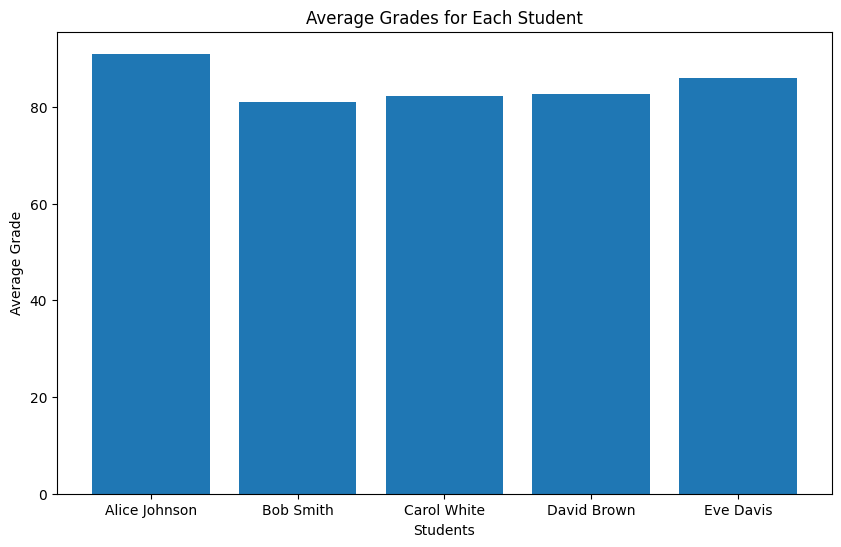

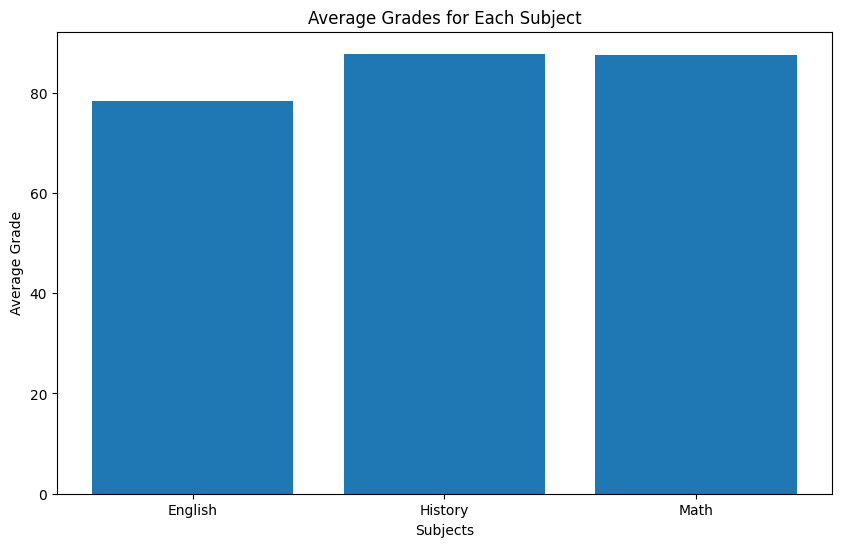

In [14]:
# Visual the data with Matplotlib
import matplotlib.pyplot as plt

df_combined_data['student_name'] = df_combined_data['first_name'] + ' ' + df_combined_data['last_name']
average_grades = df_combined_data.groupby('student_name')['grade'].mean().reset_index()

student_names = average_grades['student_name']
average_grade = average_grades['grade']

# Plotting Average grades for each student
plt.figure(figsize=(10, 6))
plt.bar(student_names,average_grade)
plt.title('Average Grades for Each Student')
plt.xlabel('Students')
plt.ylabel('Average Grade')
plt.show()

# Plotting average grade for each student

average_per_subject = df_grades.groupby('subject')['grade'].mean().reset_index()

subject_names = average_per_subject['subject']
average_subject_grade = average_per_subject['grade']

plt.figure(figsize=(10,6))
plt.bar(subject_names, average_subject_grade)
plt.title('Average Grades for Each Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Grade')
plt.show()

('Carol', 'White', 'History', 95)
('David', 'Brown', 'Math', 98)
('Eve', 'Davis', 'English', 91)


<Axes: xlabel='subject'>

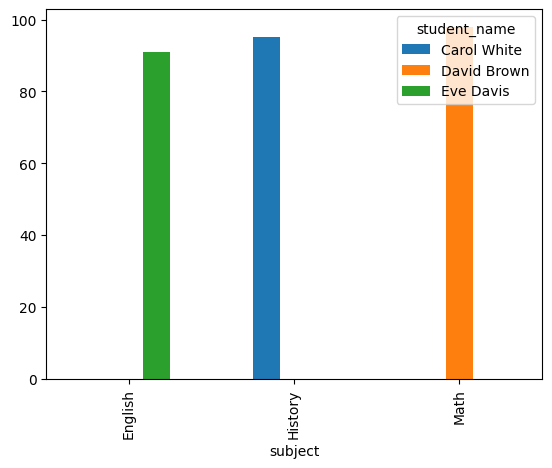

In [15]:
# Bonus Tasks

#Query that finds the student with the highest grade in each subject

cursor.execute("""
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
JOIN  grades ON students.student_id = grades.student_id
JOIN ( SELECT subject, MAX(grade) AS highest_grade FROM grades 
GROUP BY subject ) 
AS max_grades ON grades.subject = max_grades.subject AND grades.grade = max_grades.highest_grade
""")

rows5 = cursor.fetchall()

for row in rows5:
    print(row)

#Visualize the results using a grouped bar chart

query = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
JOIN  grades ON students.student_id = grades.student_id
JOIN ( SELECT subject, MAX(grade) AS highest_grade FROM grades 
GROUP BY subject ) 
AS max_grades ON grades.subject = max_grades.subject AND grades.grade = max_grades.highest_grade
"""

df_student_highest = pd.read_sql(query, con=connection)
df_student_highest['student_name'] = df_student_highest['first_name'] + ' ' + df_student_highest['last_name']
df_pivot = df_student_highest.pivot(index='subject', columns='student_name', values='grade')

df_pivot.plot(kind='bar')
